## Preliminaries: data loading and setup

In [1]:
# set wd
setwd("../R")

# dependencies
require(here)
require(ggplot2)
require(psych)
require(gridExtra)

# read data and calculate sum scores
source(here("utilities", "source_data.R"))

# read metrics
metrics <- read.csv(here("..", "..", "data", "metrics.csv"))

Loading required package: here

here() starts at /Users/danielbennett/Documents/Git/silver-screen/analysis/R

Loading required package: ggplot2

Loading required package: psych


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: gridExtra



## Tile plots (overall correlations)

Loading required package: reshape2

Warning message:
“Removed 13 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 11 rows containing missing values (geom_point).”


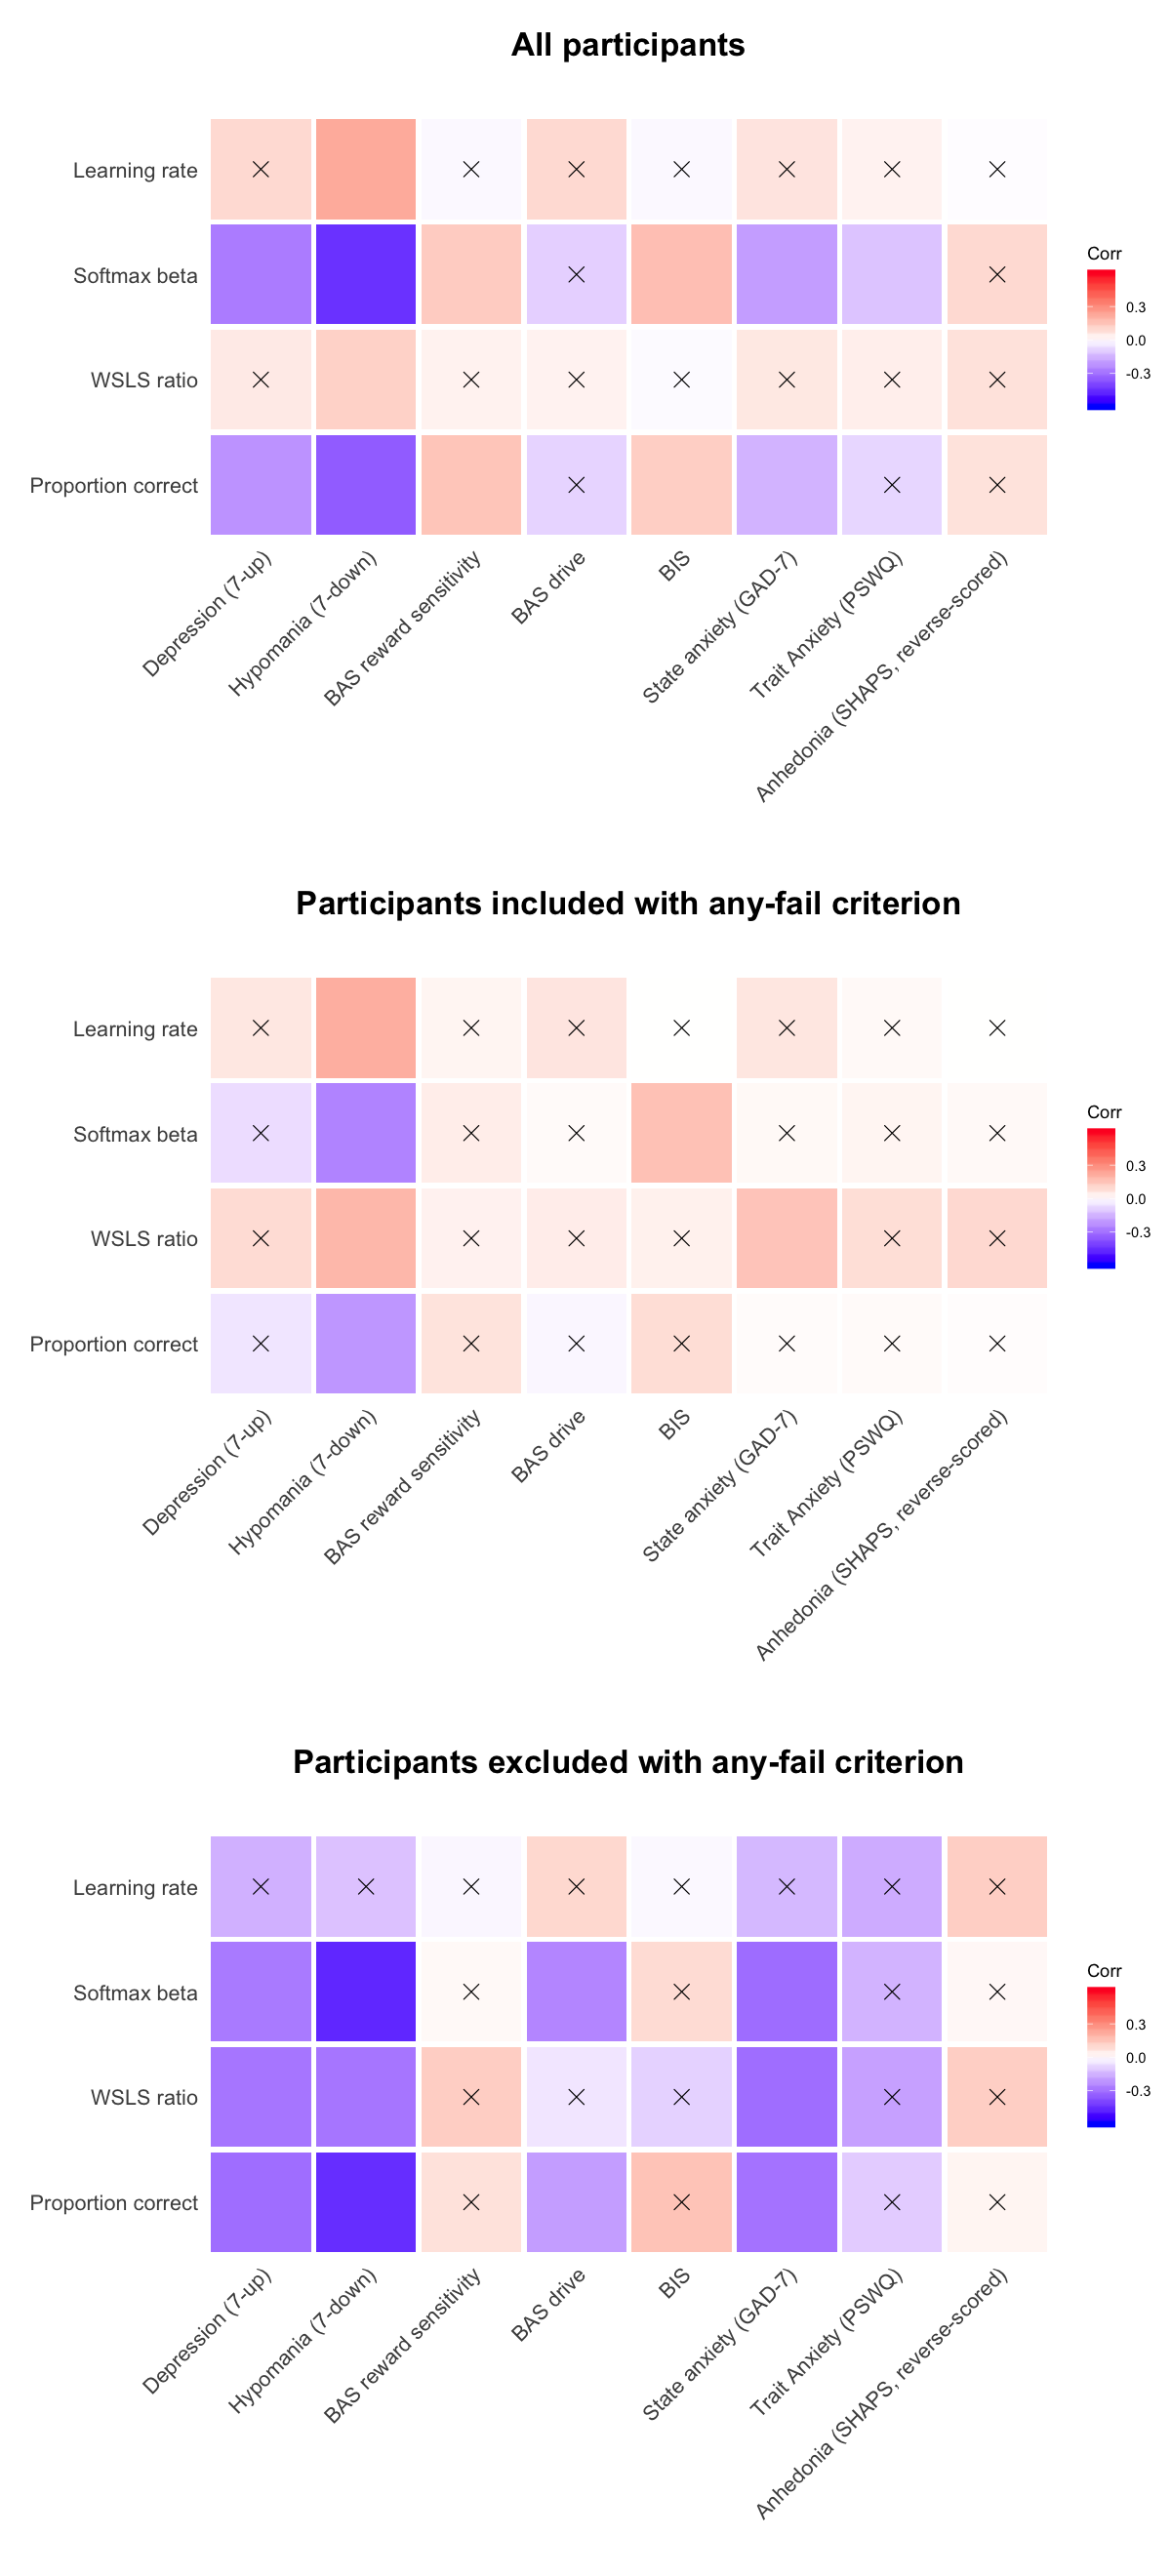

In [2]:
# read utilities for calculating tile plots
source(here("utilities", "make_tile_plot.R"))

# first pass: correlations with different measures with/without screening
survey_measures <- c("seven_down", "seven_up", "bas_rwd", "bas_drive", "bis", "gad7", "pswq", "shaps")
survey_names <- c("Depression (7-up)", "Hypomania (7-down)", "BAS reward sensitivity", "BAS drive", "BIS", "State anxiety (GAD-7)", "Trait Anxiety (PSWQ)", "Anhedonia (SHAPS, reverse-scored)")
behav_measures <- c("prop_correct", "WSLS_ratio", "RW_symm_beta", "RW_symm_eta")
behav_names <- c("Proportion correct", "WSLS ratio", "Softmax beta", "Learning rate") 

# plot correlations under different inclusion criteria
all_plot <- tile_plot(title="All participants\n", metrics, behav_measures, survey_data, survey_measures, include_ix=survey_data$n_infreq_fail >= 0)
include_plot <- tile_plot(title="Participants included with any-fail criterion\n", metrics, behav_measures, survey_data, survey_measures, include_ix=survey_data$n_infreq_fail == 0)
exclude_plot <- tile_plot(title="Participants excluded with any-fail criterion\n", metrics, behav_measures, survey_data, survey_measures, include_ix=survey_data$n_infreq_fail > 0)

# set plot options
options(repr.plot.width=10, repr.plot.height=22)
grid.arrange(all_plot, include_plot, exclude_plot, nrow=3)


## Tile plots (excluding those who are at chance on behaviour)

In [17]:
behav_incl <- metrics$prop_correct >= (qbinom(c(0.95), size=90, prob=(1/3)) / 90)

Warning message:
“Removed 13 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


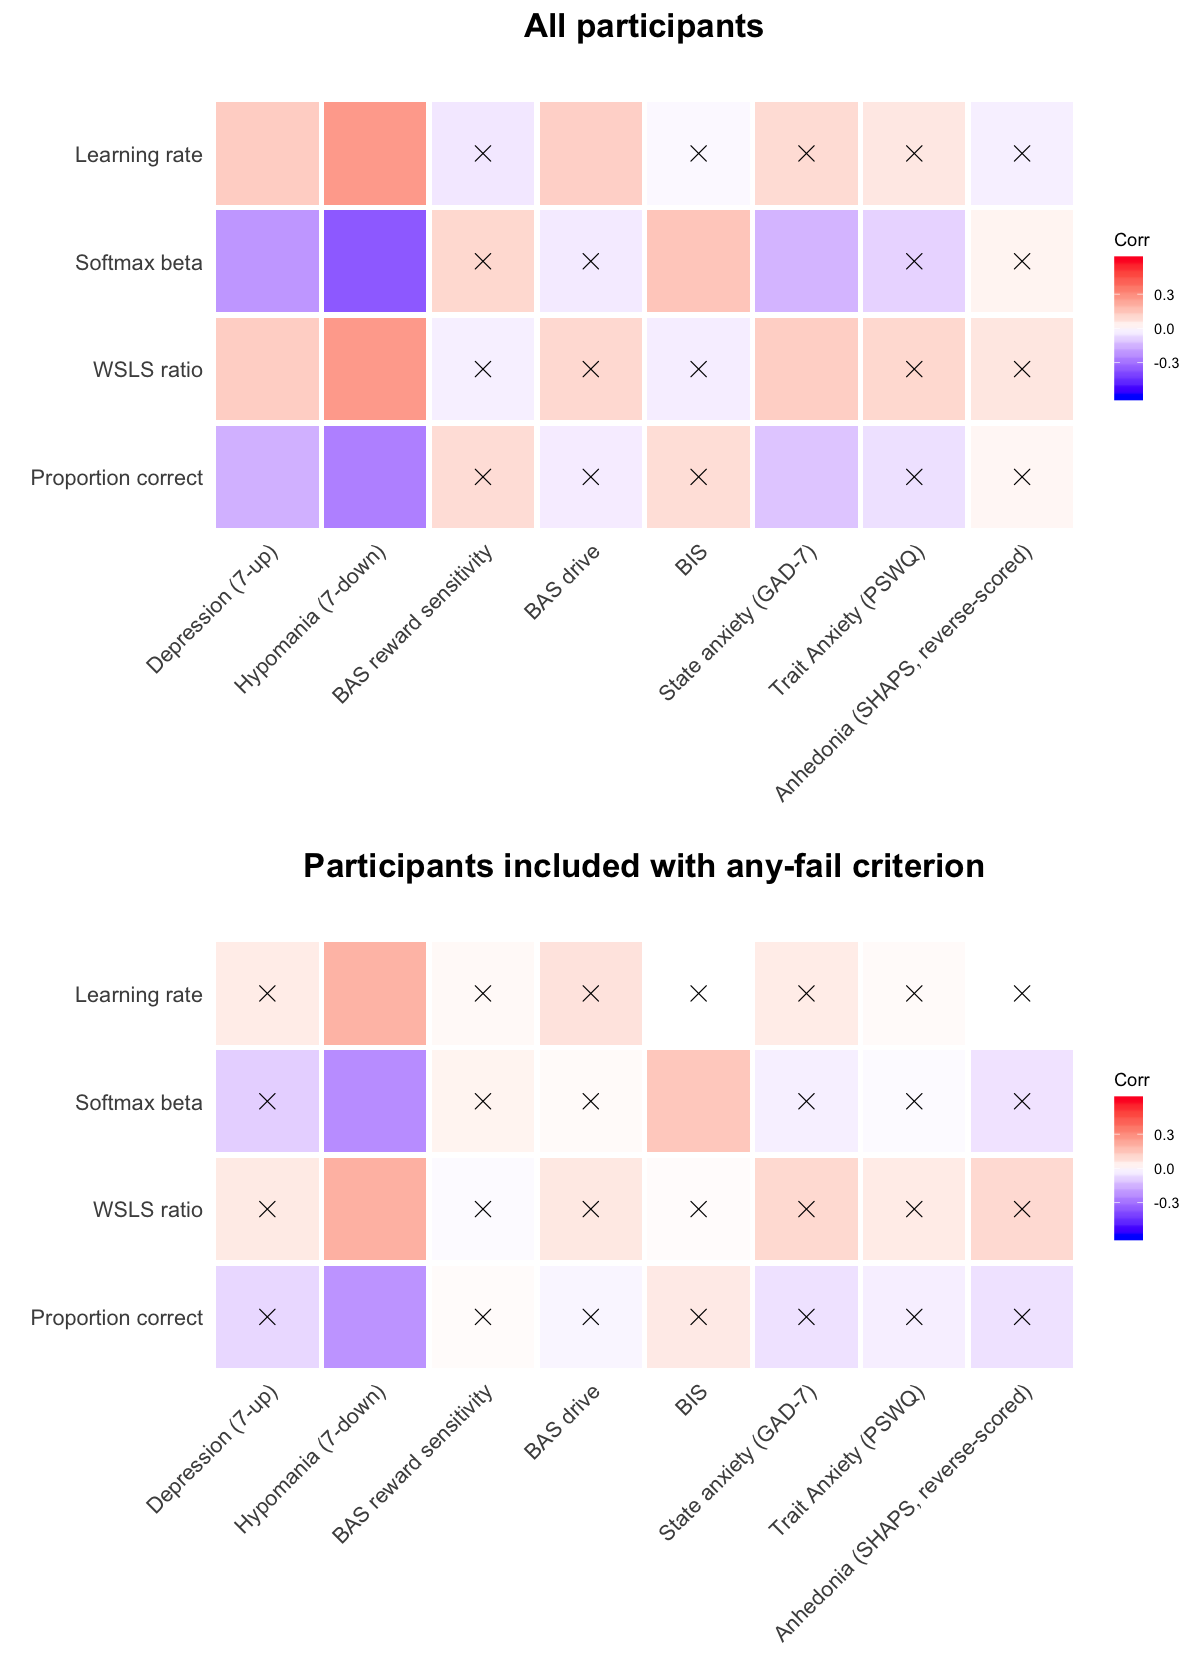

In [21]:
# plot correlations under different inclusion criteria
all_plot <- tile_plot(title="All participants\n", metrics, behav_measures, survey_data, survey_measures, include_ix=survey_data$n_infreq_fail >= 0 & behav_incl)
include_plot <- tile_plot(title="Participants included with any-fail criterion\n", metrics, behav_measures, survey_data, survey_measures, include_ix=survey_data$n_infreq_fail == 0 & behav_incl)

# set plot options
options(repr.plot.width=10, repr.plot.height=14)
grid.arrange(all_plot, include_plot, nrow=2)

## Correlations at various exclusion thresholds: depression and Softmax beta

In [3]:
# read utilities for calculating correlations at various exclusion thresholds
source(here("utilities", "plot_correlation.R"))

### With categorical cutoff

In [4]:
# make plots
full_sample_cat <- plot_corr_categorical_cutoff(survey_data, metrics, plot_title="Full sample")
mturk_cat <- plot_corr_categorical_cutoff(survey_data[survey_data$platform == "mturk",], metrics[survey_data$platform == "mturk",], plot_title="MTurk")
prolific_cat <- plot_corr_categorical_cutoff(survey_data[survey_data$platform == "prolific",], metrics[survey_data$platform == "prolific",], plot_title="Prolific")


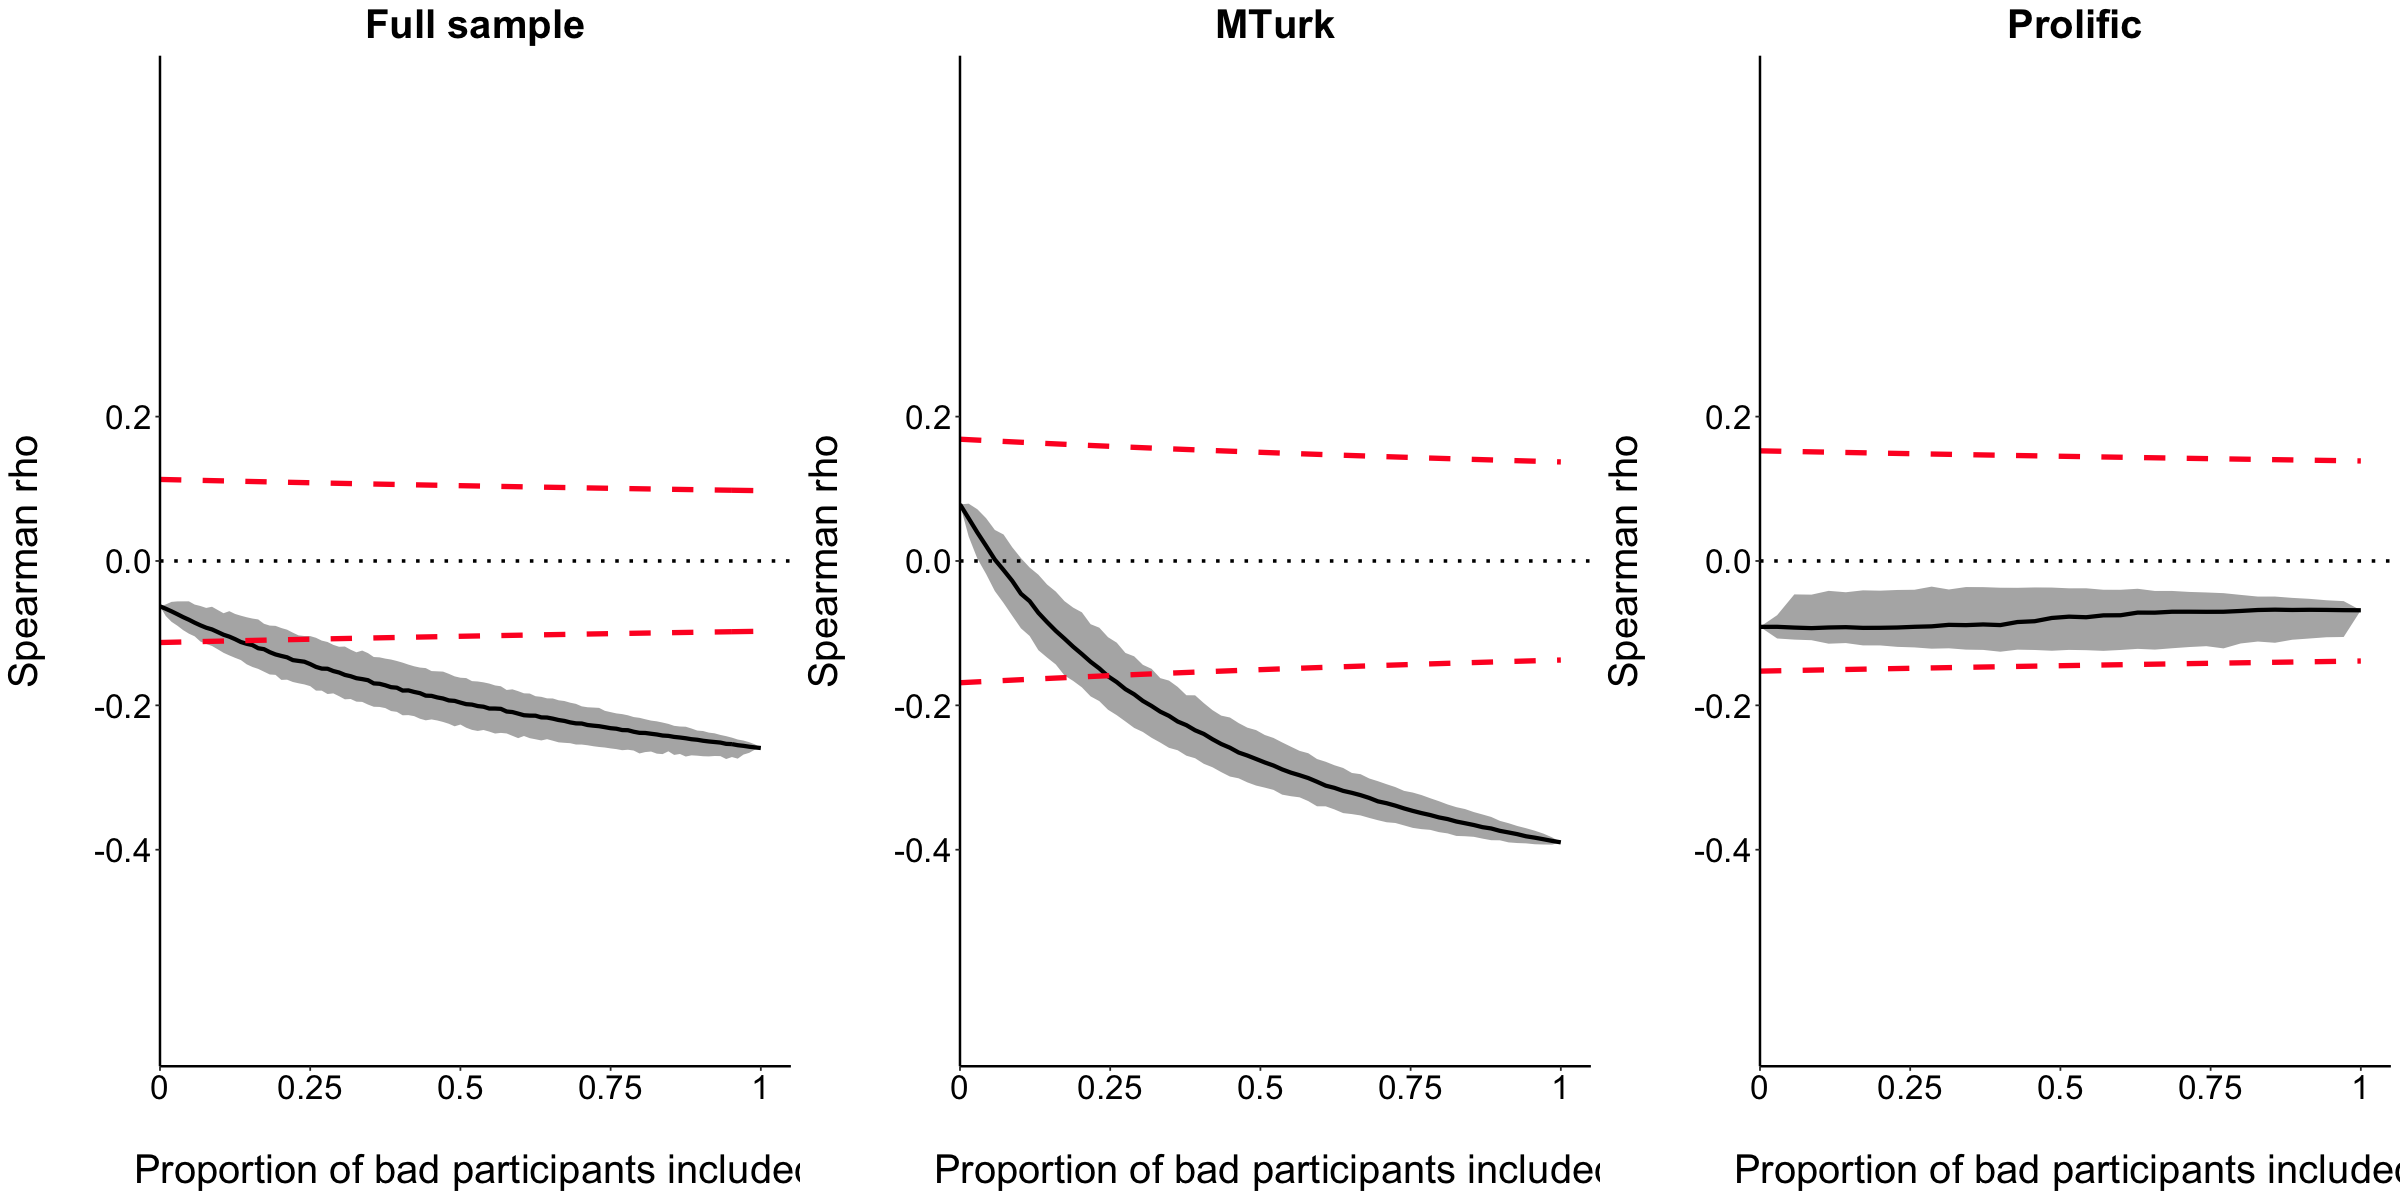

In [5]:
# display plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(full_sample_cat, mturk_cat, prolific_cat, nrow=1)


### With ordinal cutoff

In [6]:
# make plots
full_sample_ord <- plot_corr_ordinal_cutoff(survey_data, metrics, plot_title="Full sample")
mturk_ord <- plot_corr_ordinal_cutoff(survey_data[survey_data$platform == "mturk",], metrics[survey_data$platform == "mturk",], plot_title="MTurk")
prolific_ord <- plot_corr_ordinal_cutoff(survey_data[survey_data$platform == "prolific",], metrics[survey_data$platform == "prolific",], plot_title="Prolific")


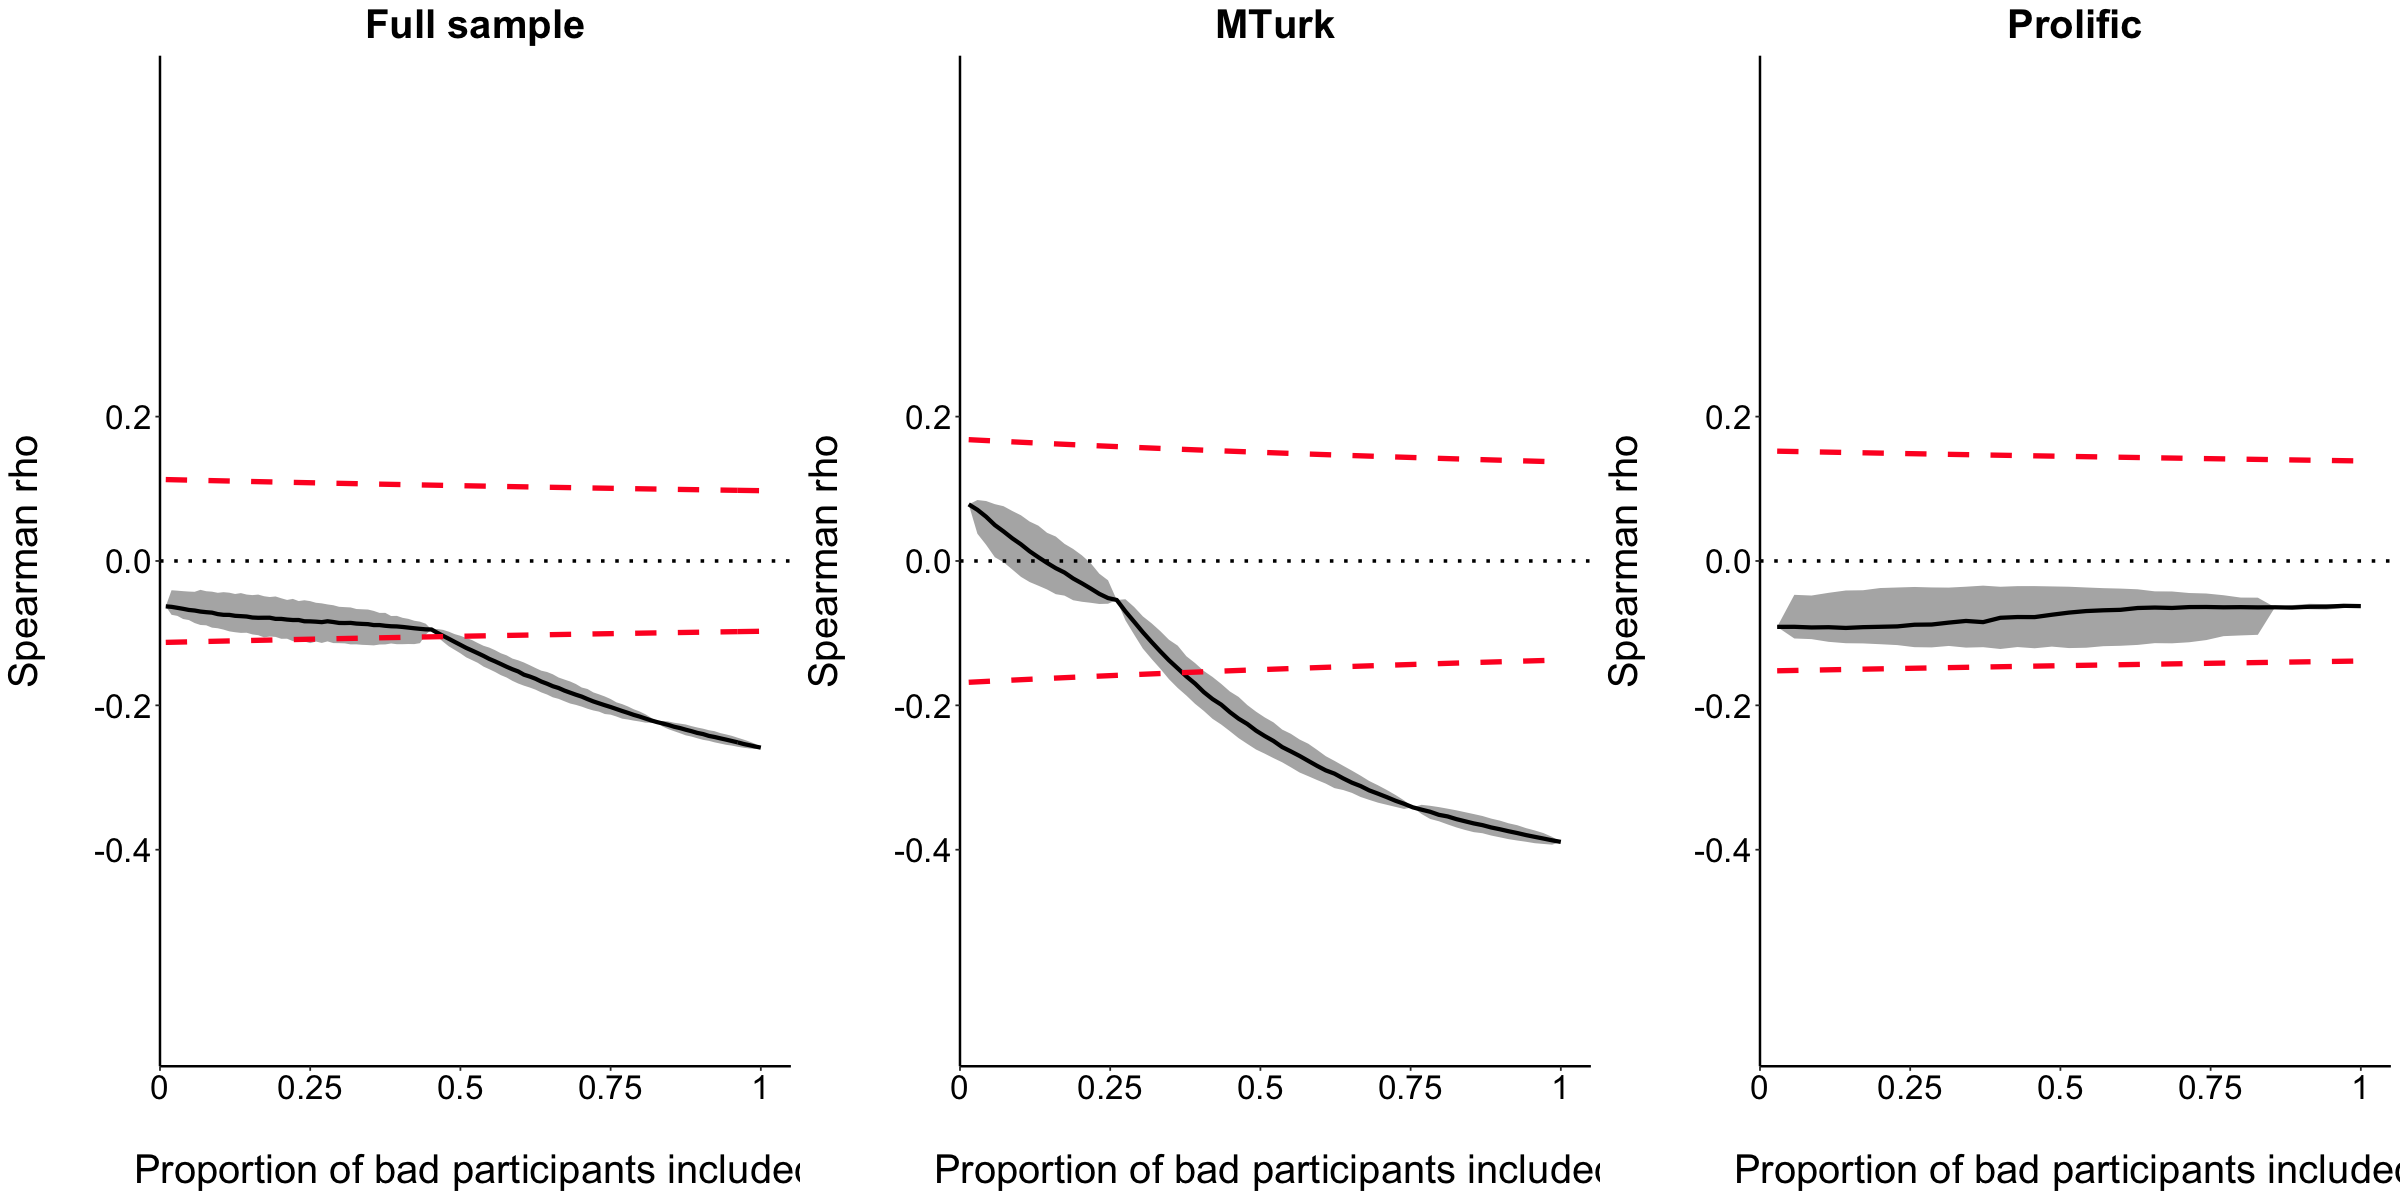

In [7]:
# display plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(full_sample_ord, mturk_ord, prolific_ord, nrow=1)


## Correlations at various exclusion thresholds: Anxiety and Softmax beta

### With categorical cutoff

In [8]:
# make plots
full_sample_cat <- plot_corr_categorical_cutoff(survey_data, metrics, survey_var="gad7", plot_title="Full sample")
mturk_cat <- plot_corr_categorical_cutoff(survey_data[survey_data$platform == "mturk",], metrics[survey_data$platform == "mturk",], survey_var="gad7", plot_title="MTurk")
prolific_cat <- plot_corr_categorical_cutoff(survey_data[survey_data$platform == "prolific",], metrics[survey_data$platform == "prolific",], survey_var="gad7", plot_title="Prolific")


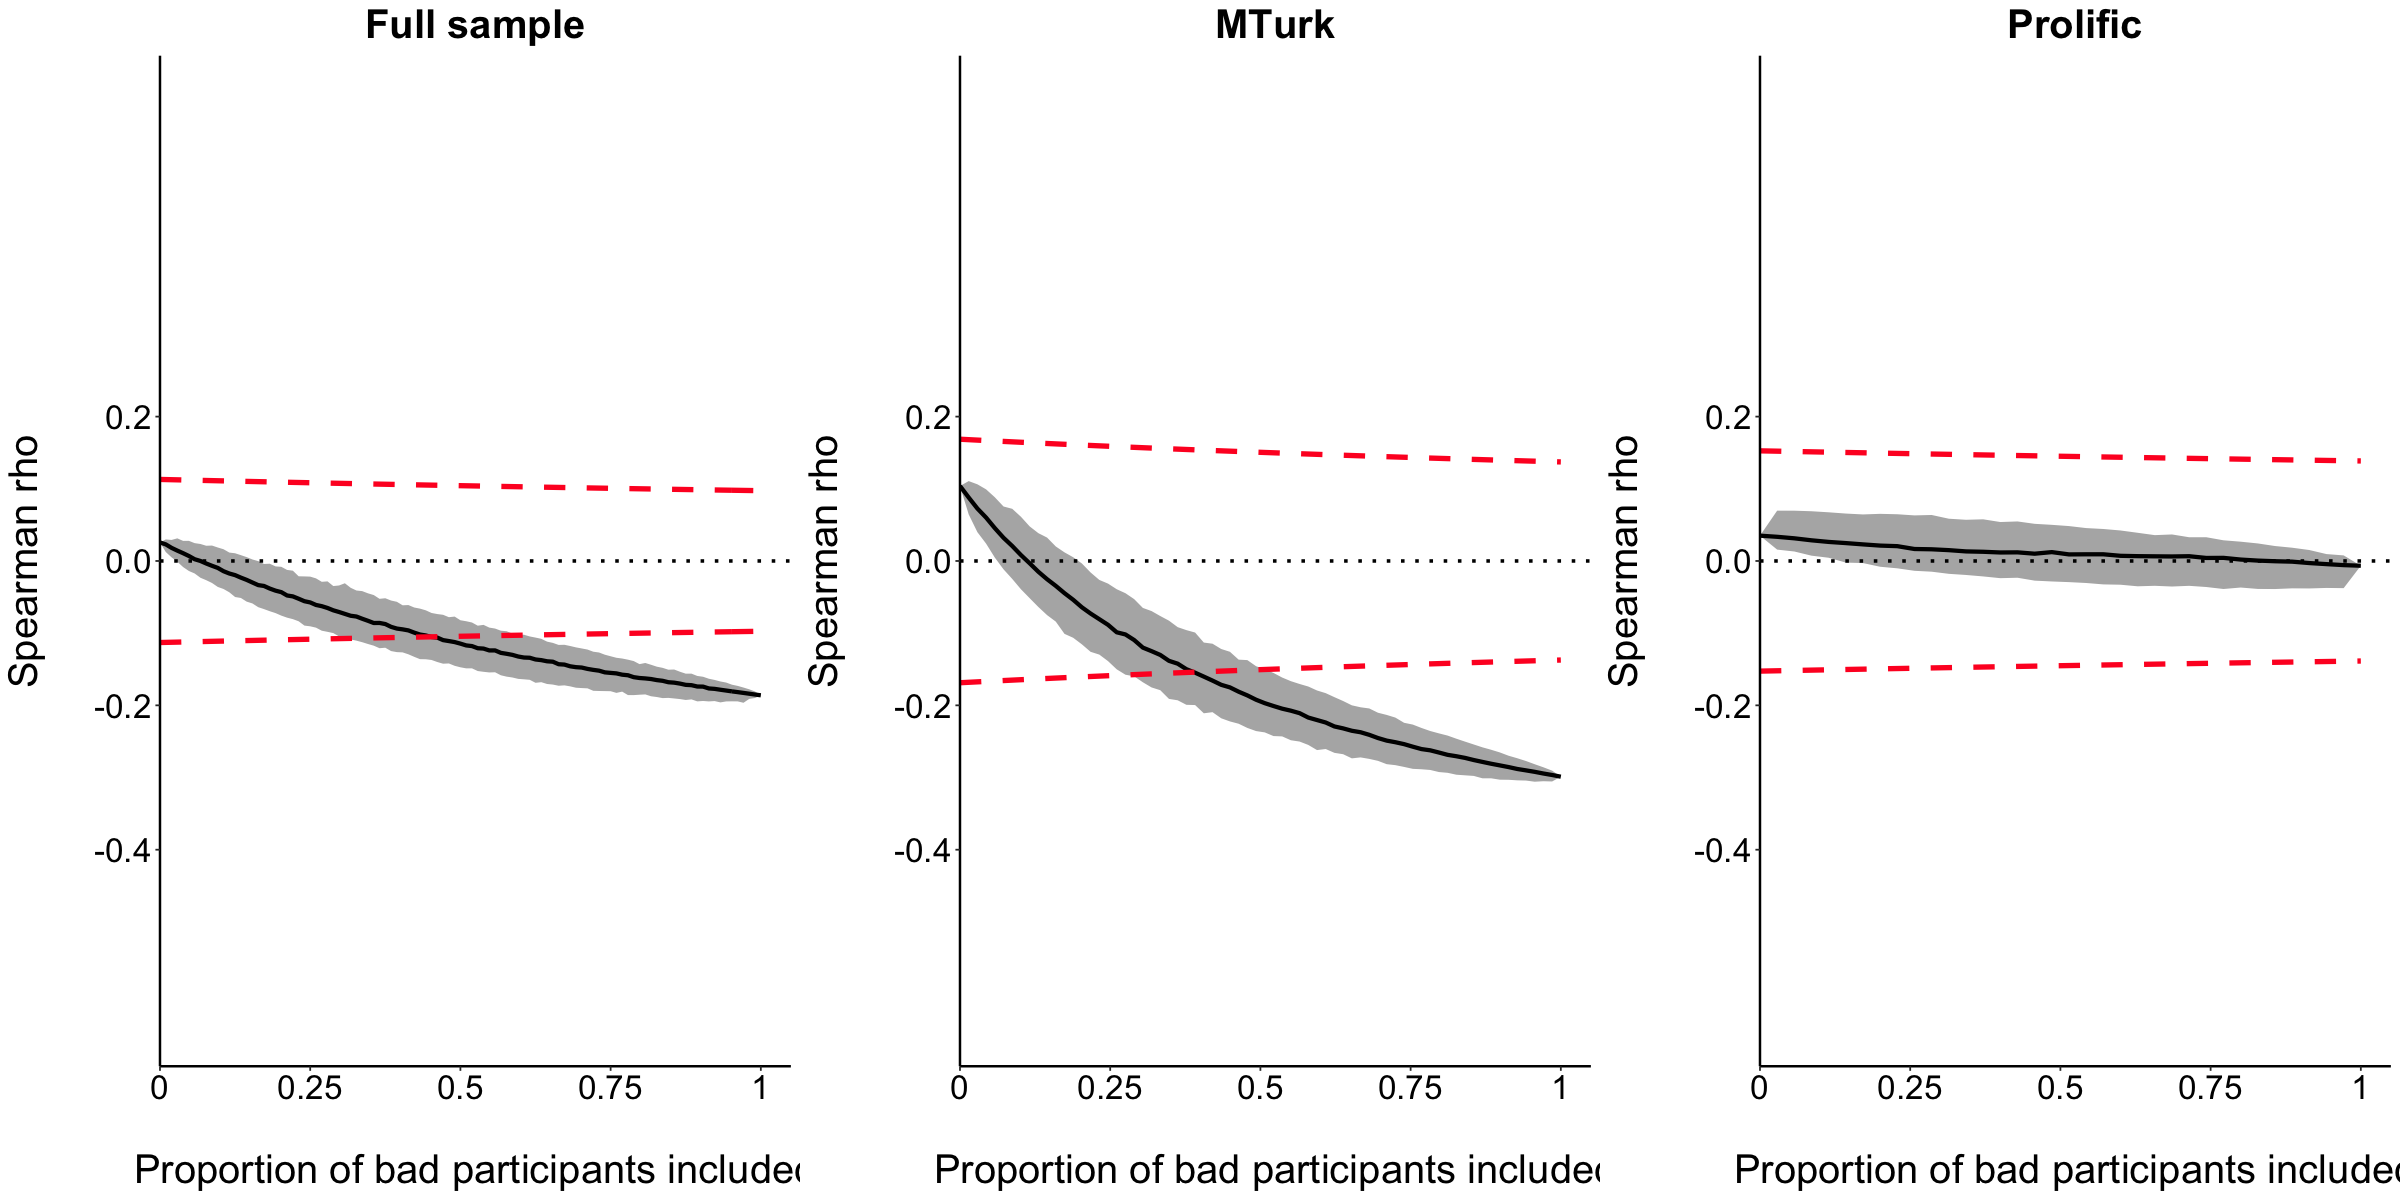

In [9]:
# display plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(full_sample_cat, mturk_cat, prolific_cat, nrow=1)


### With ordinal cutoff

In [10]:
# make plots
full_sample_ord <- plot_corr_ordinal_cutoff(survey_data, metrics, survey_var="gad7", plot_title="Full sample")
mturk_ord <- plot_corr_ordinal_cutoff(survey_data[survey_data$platform == "mturk",], metrics[survey_data$platform == "mturk",], survey_var="gad7", plot_title="MTurk")
prolific_ord <- plot_corr_ordinal_cutoff(survey_data[survey_data$platform == "prolific",], metrics[survey_data$platform == "prolific",], survey_var="gad7", plot_title="Prolific")


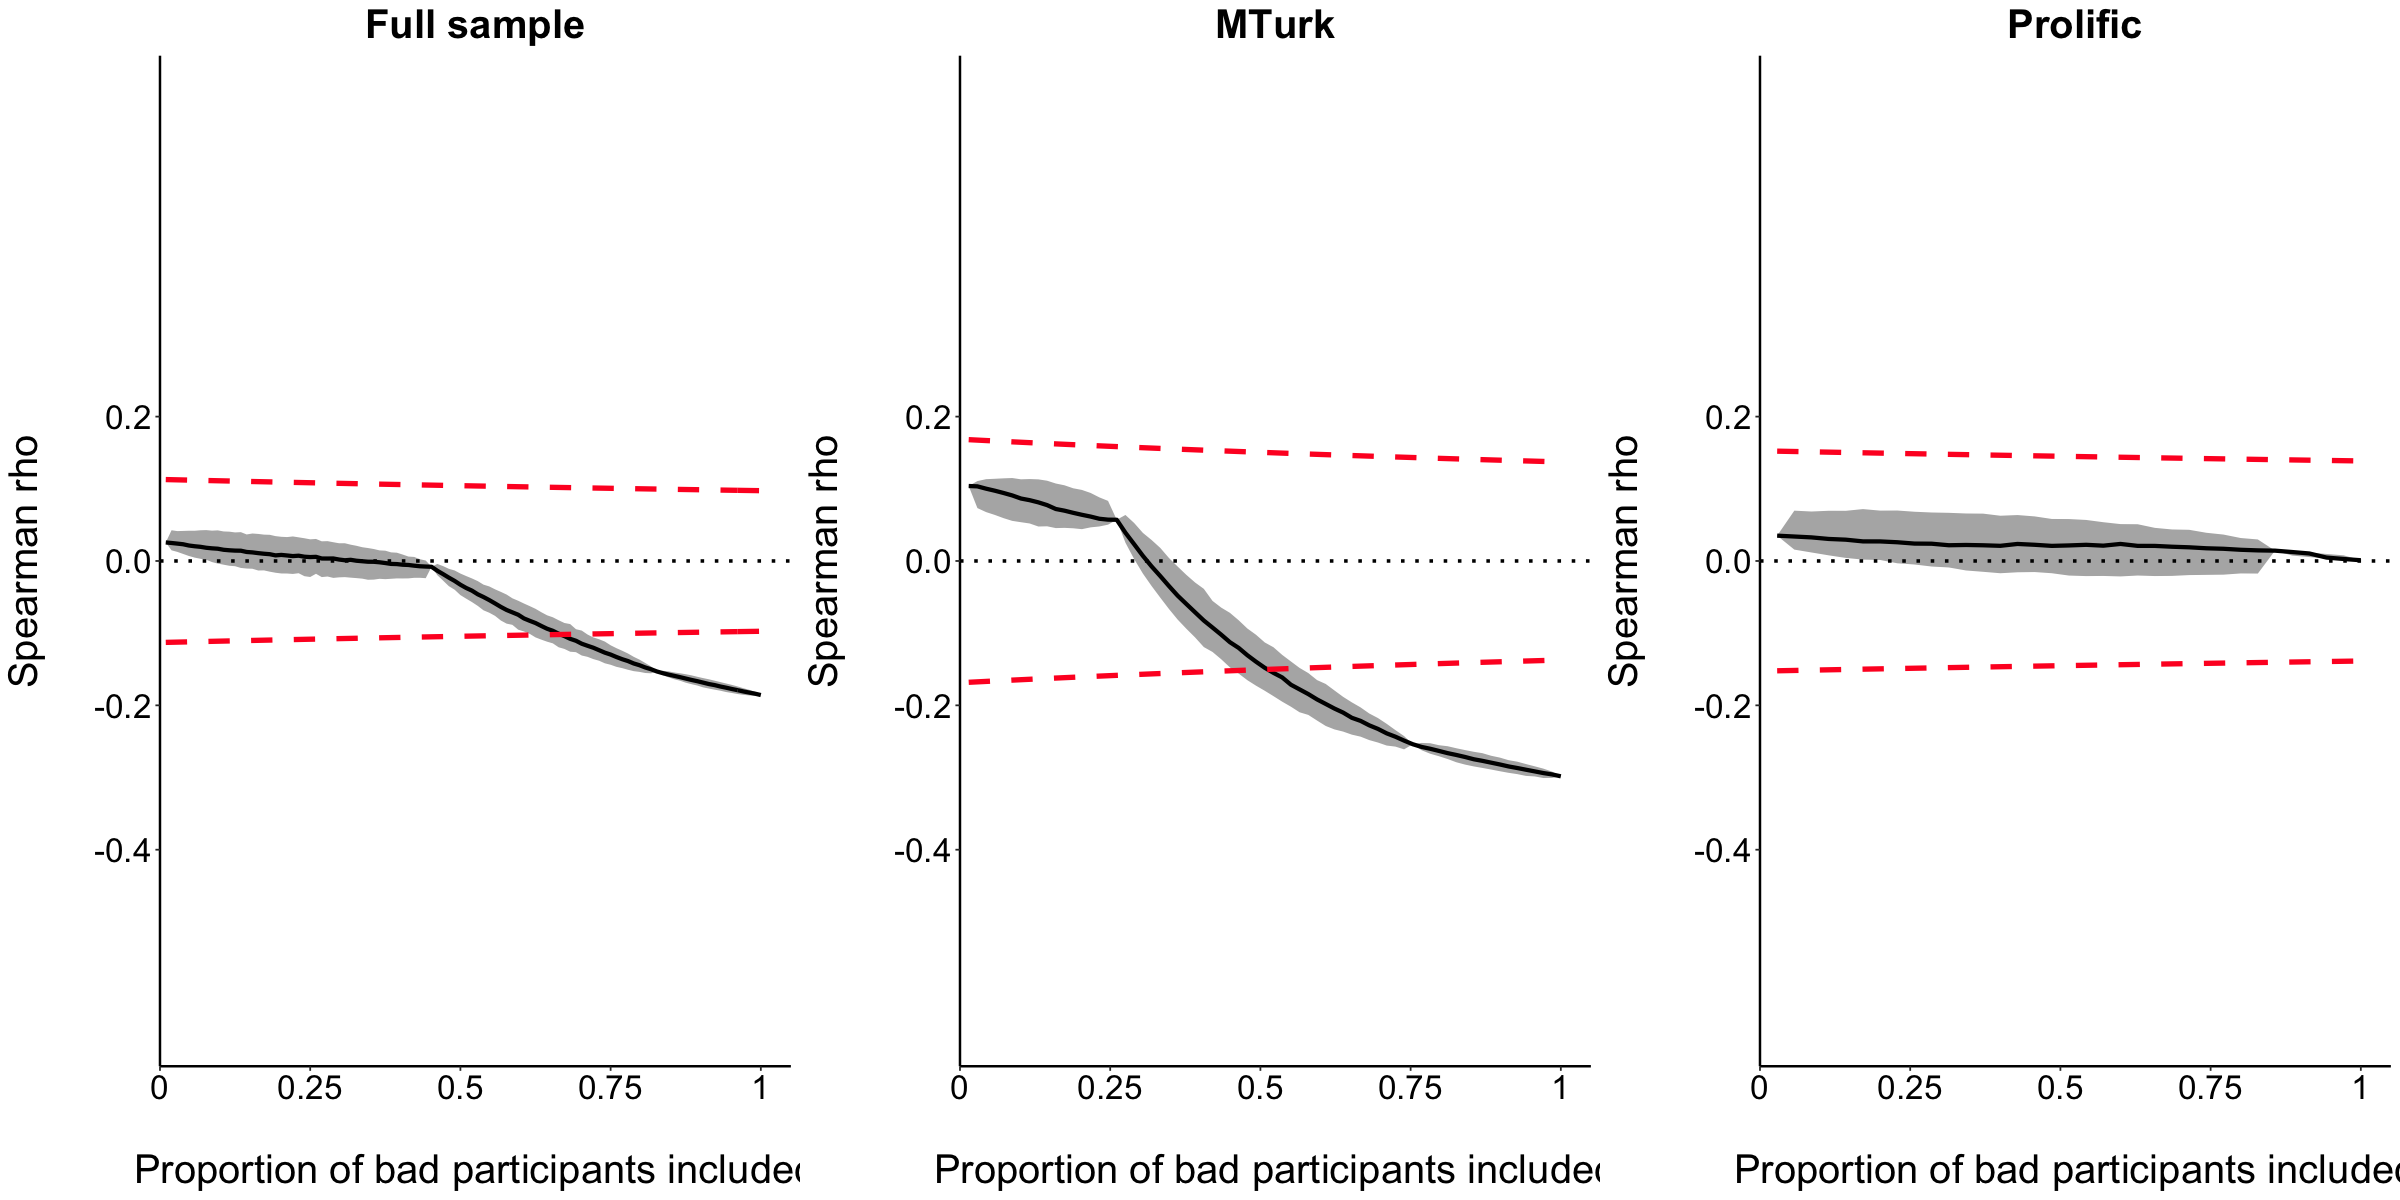

In [11]:
# display plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(full_sample_ord, mturk_ord, prolific_ord, nrow=1)


## Correlations at various exclusion thresholds: Hypomania and Softmax beta

In [12]:
# make plots
full_sample_cat <- plot_corr_categorical_cutoff(survey_data, metrics, survey_var="seven_up", plot_title="Full sample")
mturk_cat <- plot_corr_categorical_cutoff(survey_data[survey_data$platform == "mturk",], metrics[survey_data$platform == "mturk",], survey_var="seven_up", plot_title="MTurk")
prolific_cat <- plot_corr_categorical_cutoff(survey_data[survey_data$platform == "prolific",], metrics[survey_data$platform == "prolific",], survey_var="seven_up", plot_title="Prolific")


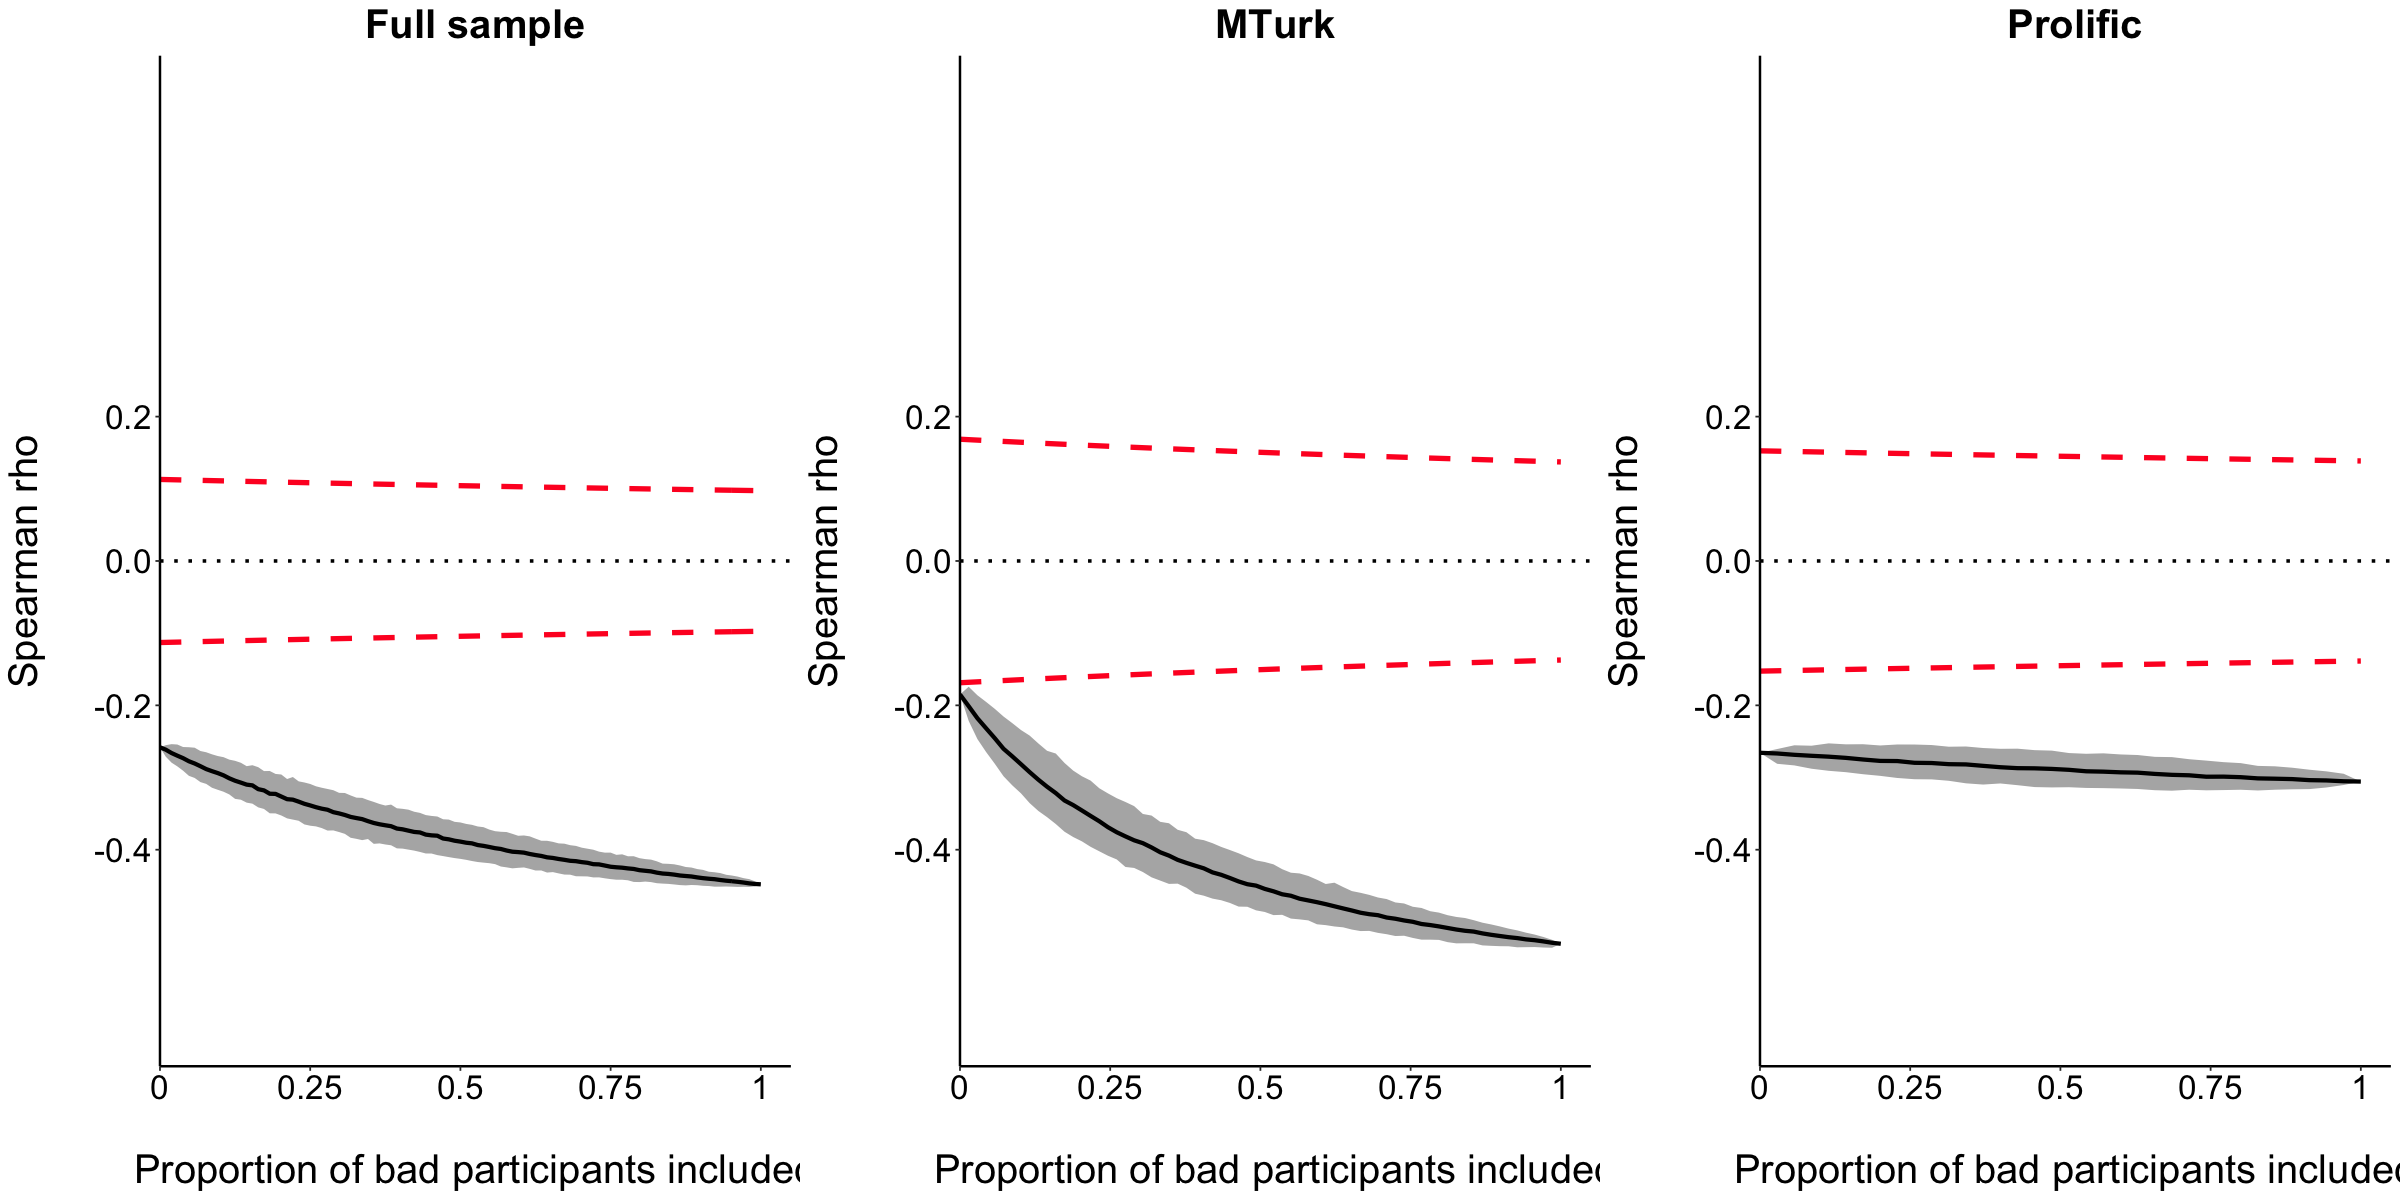

In [13]:
# display plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(full_sample_cat, mturk_cat, prolific_cat, nrow=1)


### With ordinal cutoff

In [14]:
# make plots
full_sample_ord <- plot_corr_ordinal_cutoff(survey_data, metrics, survey_var="seven_up", plot_title="Full sample")
mturk_ord <- plot_corr_ordinal_cutoff(survey_data[survey_data$platform == "mturk",], metrics[survey_data$platform == "mturk",], survey_var="seven_up", plot_title="MTurk")
prolific_ord <- plot_corr_ordinal_cutoff(survey_data[survey_data$platform == "prolific",], metrics[survey_data$platform == "prolific",], survey_var="seven_up", plot_title="Prolific")


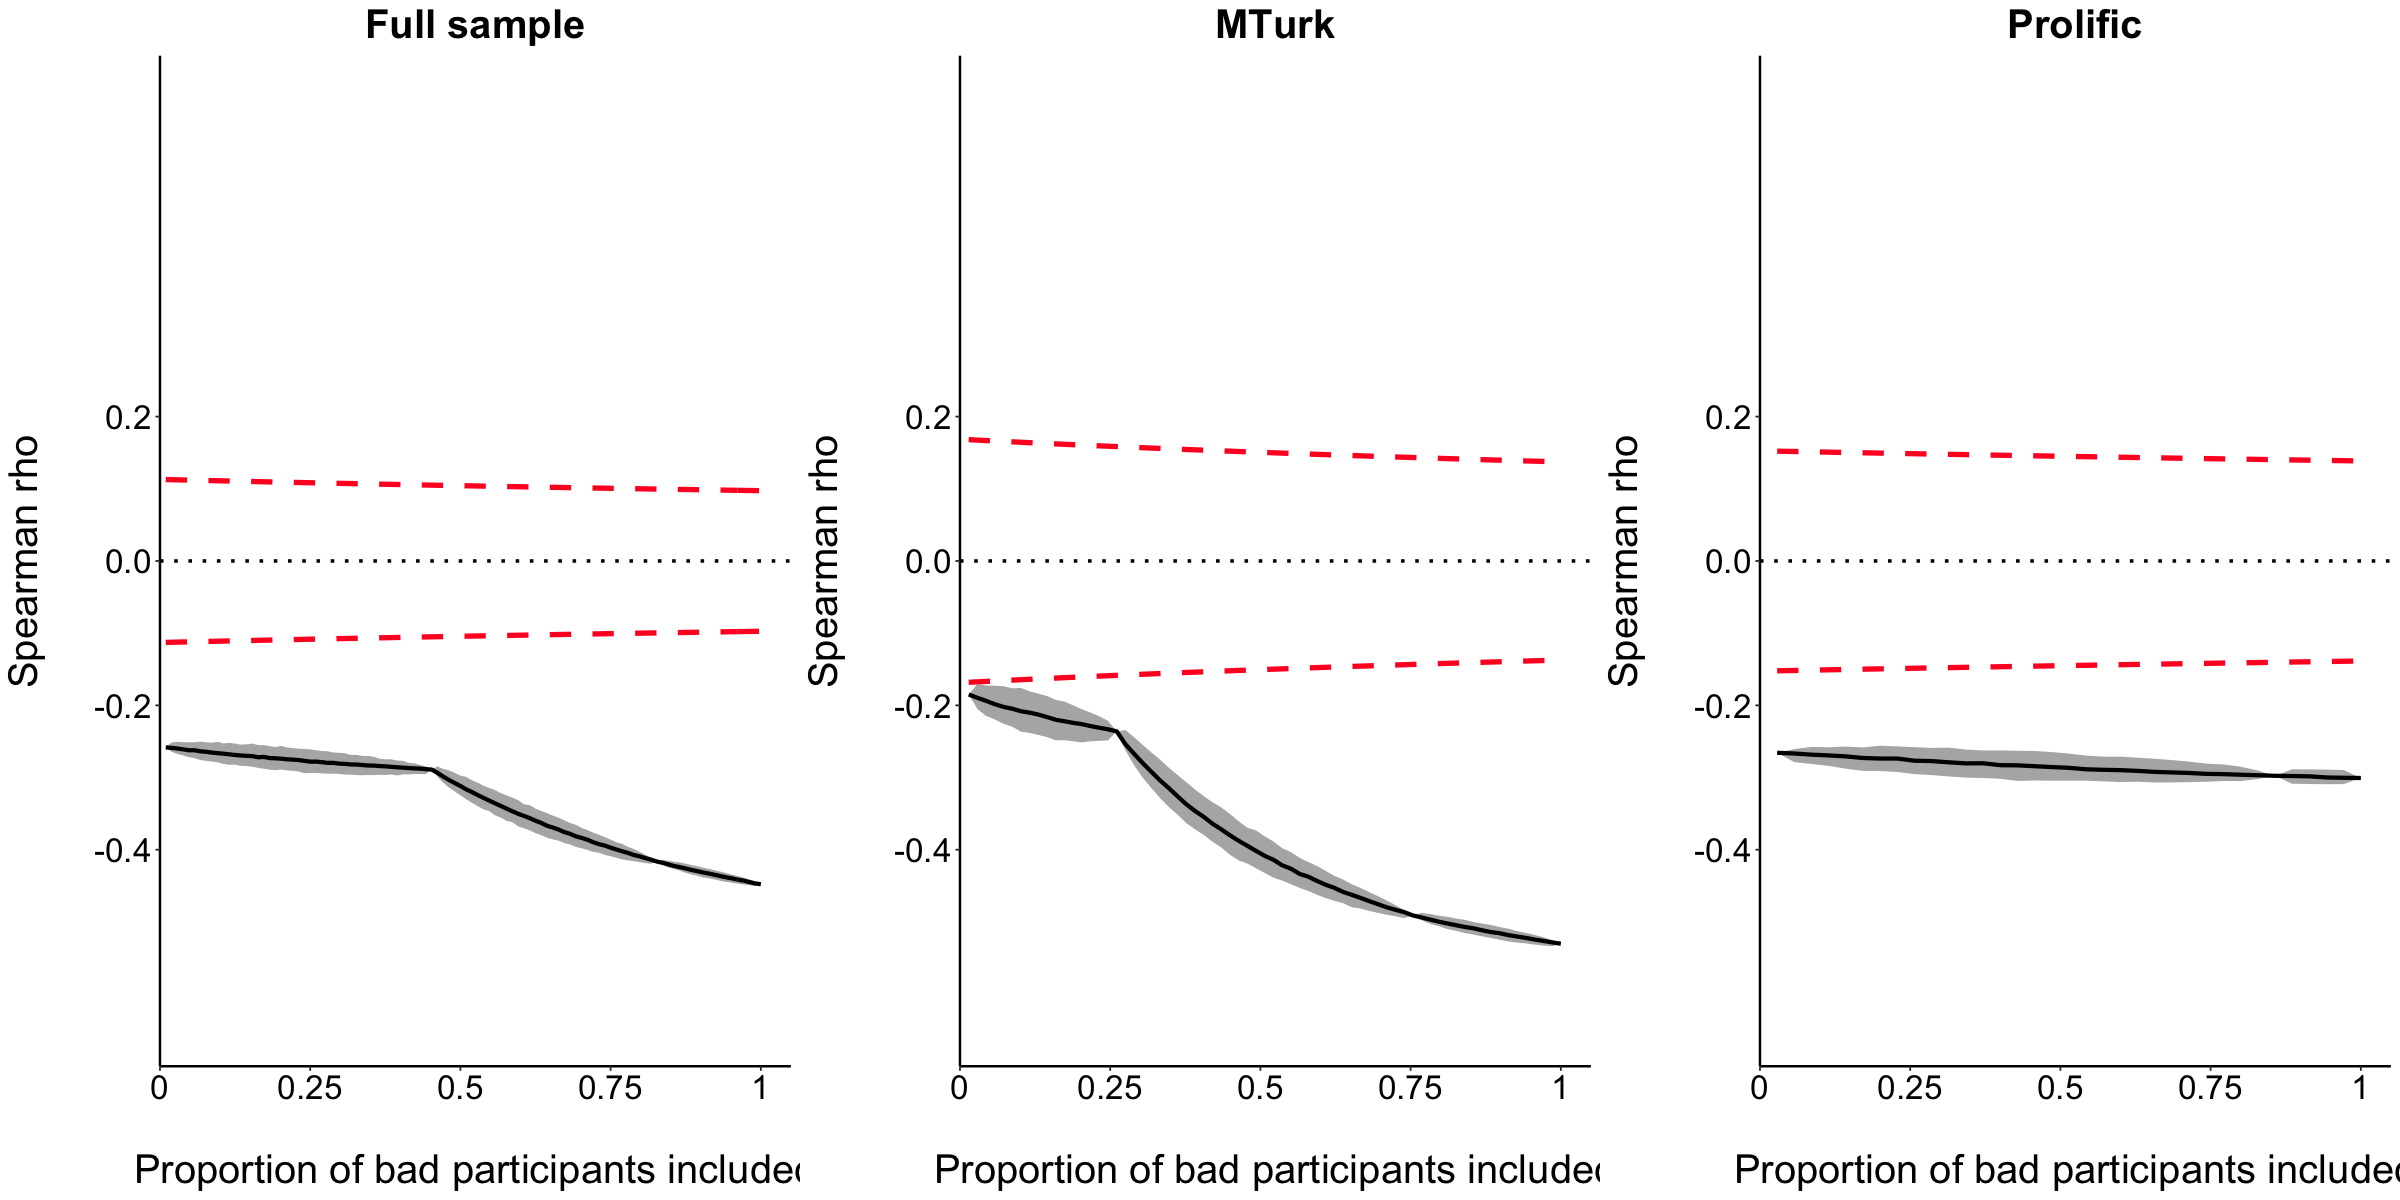

In [15]:
# display plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(full_sample_ord, mturk_ord, prolific_ord, nrow=1)
